Importando os dados e vendo uma breve descrição sobre eles

In [1]:
import pandas as pd

dados = pd.read_csv('brain_size.csv', sep=';', na_values='.')
dados.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [2]:
pd.DataFrame.describe(dados)

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


Vendo o dataframe como um dicionário de séries (listas ou arrays)

In [3]:
import numpy as np

t = np.linspace(-6,6,20)
sin_t = np.sin(t)
cos_t = np.cos(t)

In [4]:
pd.DataFrame({'t': t, 'sin(t)': sin_t, 'cos(t)': cos_t})

,t,sin(t),cos(t)
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


Vendo algumas informações a respeito do dataframe

In [5]:
# 40 linhas e 8 colunas
dados.shape

(40, 8)

In [6]:
dados.shape[0]

40

In [7]:
dados.shape[1]

8

In [8]:
# Vendo o nome das colunas
dados.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [9]:
dados.columns[1]

'Gender'

Imprimindo a coluna gênero

In [10]:
dados['Gender'].head(10)

0    Female
1      Male
2      Male
3      Male
4    Female
5    Female
6    Female
7    Female
8      Male
9      Male
Name: Gender, dtype: object

Calculando a média de VIQ de pessoas do Gênero feminino, masculino e comparando-as

In [11]:
VIQ_fem = dados[dados['Gender'] == 'Female']['VIQ'].mean()

In [12]:
VIQ_masc = dados[dados['Gender'] == 'Male']['VIQ'].mean()

In [13]:
VIQ_fem, VIQ_masc

(109.45, 115.25)

Dividindo um dataframe em variáveis categóricas

In [14]:
groupby_gender = dados.groupby('Gender')

In [15]:
for gender, value in groupby_gender['VIQ']:
    print((gender, value))

('Female', 0     132
4     132
5      90
6     136
7      90
10    129
13    120
14    100
15     71
16    132
18    112
22    129
24     86
26     90
28     83
29    126
30    126
34     90
35    129
37     86
Name: VIQ, dtype: int64)
('Male', 1     150
2     123
3     129
8      93
9     114
11    150
12    129
17     96
19     77
20     83
21    107
23    145
25    145
27     96
31    145
32     96
33     96
36    150
38     90
39     91
Name: VIQ, dtype: int64)


In [16]:
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


Vendo a média das outras categorias em um dataframe

In [17]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


### Exercício

- Qual é o valor médio de VIQ para a população total?

In [18]:
VIQ_total = dados['VIQ'].mean()
VIQ_total

112.35

- Quantos homens/mulheres foram incluídos neste estudo?

In [19]:
homens_total = dados[dados['Gender'] == 'Male']['Gender'].count()
homens_total

20

In [20]:
mulheres_total = dados[dados['Gender'] == 'Female']['Gender'].count()
mulheres_total

20

- Qual é o valor médio das contagens de ressonância magnética expressa em unidades logarítmicas, para homens e mulheres?

In [21]:
MRI_homem = dados[dados['Gender'] == 'Male']['MRI_Count'].mean()
MRI_homem

954855.4

In [22]:
MRI_mulher = dados[dados['Gender'] == 'Female']['MRI_Count'].mean()
MRI_mulher

862654.6

Plotando um bloxpot contendo as variáveis FSIQ, VIQ, PIQ

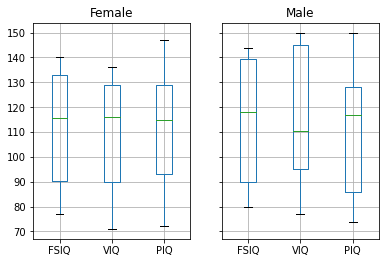

In [23]:
import matplotlib.pyplot as plt

groupby_gender.boxplot(column=['FSIQ', 'VIQ', 'PIQ'])
plt.show()

Matriz de dispersão

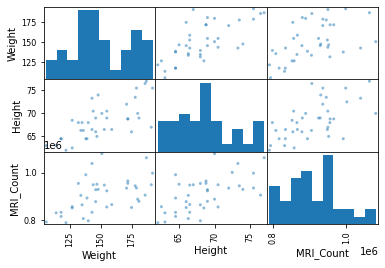

In [24]:
pd.plotting.scatter_matrix(dados[['Weight', 'Height', 'MRI_Count']]) 
plt.show()

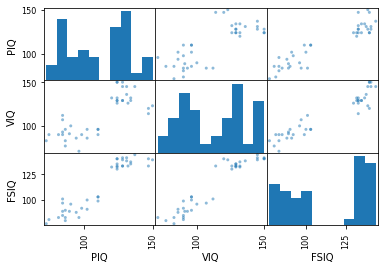

In [25]:
pd.plotting.scatter_matrix(dados[['PIQ', 'VIQ', 'FSIQ']])
plt.show()

### Exercício

Plote a matriz de dispersão apenas para machos e apenas para fêmeas. Você acha que as 2 subpopulações correspondem ao gênero?

In [26]:
VIQ_macho = dados[dados['Gender'] == 'Male']['VIQ']
PIQ_macho = dados[dados['Gender'] == 'Male']['PIQ']
FSIQ_macho = dados[dados['Gender'] == 'Male']['FSIQ']

In [27]:
VIQ_femea = dados[dados['Gender'] == 'Female']['VIQ']
PIQ_femea = dados[dados['Gender'] == 'Female']['PIQ']
FSIQ_femea = dados[dados['Gender'] == 'Female']['FSIQ']

In [28]:
dataframe_dispersao_macho = pd.DataFrame({'VIQ_macho': VIQ_macho, 'PIQ_macho': PIQ_macho, 'FSIQ_macho': FSIQ_macho})
dataframe_dispersao_macho.head()

,VIQ_macho,PIQ_macho,FSIQ_macho
1,150,124,140
2,123,150,139
3,129,128,133
8,93,84,89
9,114,147,133


In [29]:
dataframe_dispersao_femea = pd.DataFrame({'VIQ_femea': VIQ_femea, 'PIQ_femea': PIQ_femea, 'FSIQ_femea': FSIQ_femea})
dataframe_dispersao_femea.head()

,VIQ_femea,PIQ_femea,FSIQ_femea
0,132,124,133
4,132,134,137
5,90,110,99
6,136,131,138
7,90,98,92


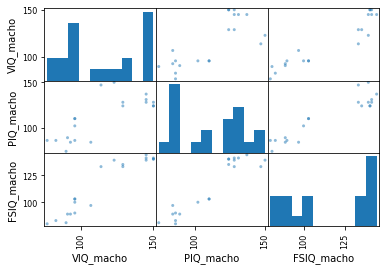

In [30]:
pd.plotting.scatter_matrix(dataframe_dispersao_macho)
plt.show()

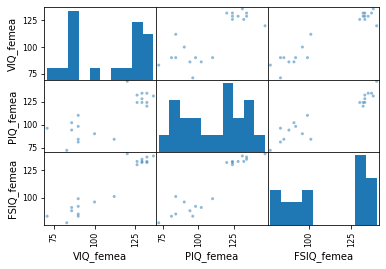

In [31]:
pd.plotting.scatter_matrix(dataframe_dispersao_femea)
plt.show()

### Teste de hipóteses
#### Teste t de student: o teste estatístico mais simples
Para isso vamos precisar, usar:

`from scipy import stats`

Verificando se a média populacional dos dados é igual a 0

In [32]:
from scipy import stats

In [33]:
# Não é igual a zero por causa do baixo pvalue
stats.ttest_1samp(dados['VIQ'], 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

Verificando se a diferença entre a média de VIQ entre homens e mulheres é significativa

In [34]:
stats.ttest_ind(VIQ_macho, VIQ_femea)

Ttest_indResult(statistic=0.7726161723275011, pvalue=0.44452876778583217)

FSIQ e PIQ podem ser medidos nos mesmos indivíduos. Para eliminar esse problema, usamos a seguinte abordagem:

In [36]:
stats.ttest_rel(dados['FSIQ'], dados['PIQ'])

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

Isso é equivalente a:

In [38]:
stats.ttest_1samp(dados['FSIQ'] - dados['PIQ'], 0)

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

### Exercício

- Teste a diferença entre pesos em machos e fêmeas.
- Use estatísticas não paramétricas para testar a diferença entre o VIQ em homens e mulheres.

In [41]:
stats.ttest_ind(dados[dados['Gender'] == 'Male']['Weight'].dropna(), dados[dados['Gender'] == 'Male']['Weight'].dropna())

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [42]:
stats.ttest_ind(dados[dados['Gender'] == 'Male']['VIQ'].dropna(), dados[dados['Gender'] == 'Male']['VIQ'].dropna())

Ttest_indResult(statistic=0.0, pvalue=1.0)

### Modelos lineares

In [43]:
import numpy as np

x = np.linspace(-5,5,20)
np.random.seed(1)
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
data = pd.DataFrame({'x': x, 'y': y})

In [51]:
from statsmodels.formula.api import ols

model = ols("y ~ x", data).fit()

In [52]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Mon, 30 May 2022   Prob (F-statistic):           8.56e-08
Time:                        22:04:58   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

Comparando grupos ou várias categorias

In [53]:
model2 = ols("VIQ ~ Gender + 1", dados).fit()

In [54]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Mon, 30 May 2022   Prob (F-statistic):              0.445
Time:                        22:08:39   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

Forçando uma coluna ser considerada como uma variável categórica

In [56]:
model3 = ols('VIQ ~ C(Gender)', dados).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Mon, 30 May 2022   Prob (F-statistic):              0.445
Time:                        22:10:43   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           109.4500      5.30